In [ ]:
pip install mtcnn opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.7 MB/s eta 0:00:00


# Setting up the Environment

Importing necessary libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from mtcnn import MTCNN
import cv2
import os


In [ ]:
# Creating some helper functions
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Face Detection and Extraction

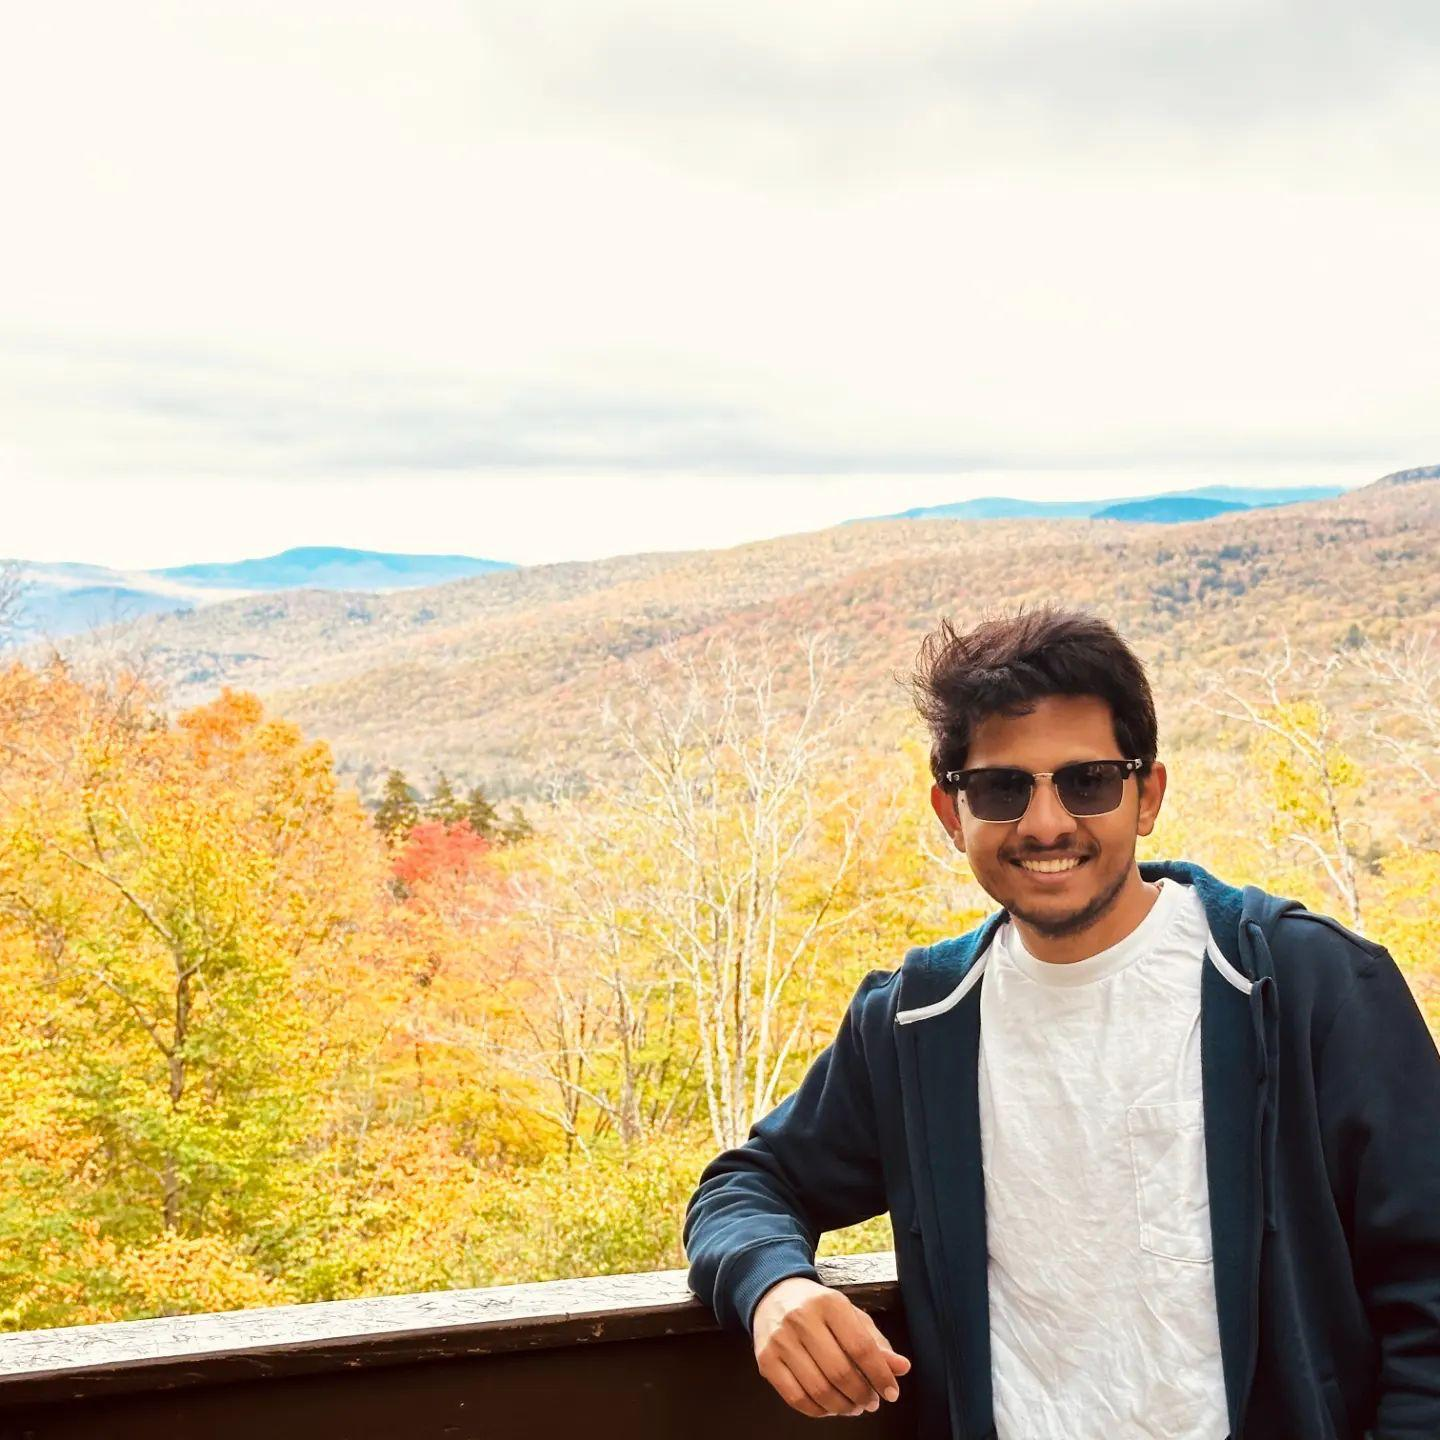

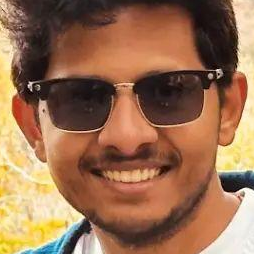

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to perform face detection and extract the face ROI
def detect_and_extract_face(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale (Haar cascades work on grayscale images)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Extract the first detected face (assuming there is at least one face)
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        face_roi = img[y:y+h, x:x+w]
        return face_roi
    else:
        return None

# Example usage
# image_path = '/Sample_Data/N6.jpg'
image_path = '/content/drive/MyDrive/DL_PROJECT_DATA/SREENI/photo_13.jpg'
detected_face = detect_and_extract_face(image_path)

# Display the detected face
if detected_face is not None:
    cv2_imshow(cv2.imread(image_path))
    cv2_imshow(detected_face)
else:
    print("No face detected.")


# Face Detection and Extraction with MTCNN on the entire dataset.

In [ ]:
from mtcnn import MTCNN
import cv2
import os
from google.colab.patches import cv2_imshow


input_folder = r"/content/drive/MyDrive/DL_PROJECT_DATA"
output_folder = r"/content/drive/My Drive/processed_image/"

# Initialize MTCNN detector
detector = MTCNN()

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to perform face detection and extract the face ROI
def detect_and_extract_face(image_path,output_image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale (Haar cascades work on grayscale images)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Extract the first detected face (assuming there is at least one face)
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        face_roi = img[y:y+h, x:x+w]
        return cv2.imwrite(output_image_path, face_roi)

for root, dirs, files in os.walk(input_folder):
    for file in files:
        # Check if the current file is an image file
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            input_image_path = os.path.join(root, file)
            # Create corresponding output folder structure
            relative_path = os.path.relpath(input_image_path, input_folder)
            output_image_folder = os.path.join(output_folder, os.path.dirname(relative_path))
            if not os.path.exists(output_image_folder):
                os.makedirs(output_image_folder)
            # Generate output image path
            output_image_path = os.path.join(output_folder, relative_path)
            # Extract faces and save them to the output folder
            detect_and_extract_face(input_image_path, output_image_path)
            print(f"Processed and saved: {output_image_path}")


Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/3.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/8.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/1.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/4.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/5.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/2.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/7.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/10.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/9.jpg
Processed and saved: /content/drive/My Drive/processed_image/SOWMYA/6.jpg
Processed and saved: /content/drive/My Drive/processed_image/TORI/3.jpg
Processed and saved: /content/drive/My Drive/processed_image/TORI/4.jpg
Processed and saved: /content/drive/My Drive/processed_image/TORI/8.jpg
Processed and saved: /content/drive/My Driv

# Train Test Split

In [ ]:
import os
import shutil
import random

# Define paths
dataset_dir = "/content/drive/MyDrive/processed_image/"
train_dir = "/content/drive/My Drive/processed_image/training/"
test_dir = "/content/drive/My Drive/processed_image/testing/"
valid_dir = "/content/drive/My Drive/processed_image/validation/"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# List person folders in the dataset directory
person_folders = os.listdir(dataset_dir)

# Randomly shuffle the person_folders list
random.shuffle(person_folders)

# Calculate the number of persons for each set
total_persons = len(person_folders)
train_count = int(total_persons * 0.8)
test_count = int(total_persons * 0.1)
valid_count = int(total_persons * 0.1)

# Iterate through each person's folder and copy images to respective directories
for i, person_folder in enumerate(person_folders):
    person_path = os.path.join(dataset_dir, person_folder)
    if os.path.isdir(person_path):
        # List images in the person's folder
        images = os.listdir(person_path)

        # Determine the destination directory based on the split ratios
        if i < train_count:
            dest_dir = train_dir
        elif i < train_count + test_count:
            dest_dir = test_dir
        else:
            dest_dir = valid_dir

        # Create the destination directory if it doesn't exist
        os.makedirs(os.path.join(dest_dir, person_folder), exist_ok=True)

        # Copy images to the destination directory
        for image in images:
            # Check if the file is a regular file (not a directory)
            if os.path.isfile(os.path.join(person_path, image)):
                shutil.copy(os.path.join(person_path, image), os.path.join(dest_dir, person_folder, image))

print("Dataset split into training, testing, and validation sets based on individual persons.")


Dataset split into training, testing, and validation sets based on individual persons.


# Data Preprocessing: Compute Mean and Standard Deviation for Normalization Purpose





In [ ]:
import os
import torch
from torchvision import datasets, transforms

# Define the data transformation pipeline
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust the size if needed
    transforms.ToTensor(),
])

# Create the ImageFolder dataset using the custom transformation
dataset = datasets.ImageFolder(root="/content/drive/My Drive/processed_image/training/", transform=data_transform)

# Create a DataLoader to iterate over the dataset
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables for accumulating mean and variance
mean_sum = torch.zeros(3)
var_sum = torch.zeros(3)
total_pixels = 0

# Iterate over the dataset to accumulate mean and variance
for images, _ in data_loader:
    batch_size, channels, height, width = images.size()
    total_pixels += batch_size * height * width
    mean_sum += torch.sum(images, dim=(0, 2, 3))

# Calculate mean
mean = mean_sum / total_pixels

# Iterate over the dataset again to accumulate squared differences for variance
for images, _ in data_loader:
    var_sum += torch.sum((images - mean.unsqueeze(1).unsqueeze(2).unsqueeze(3)) ** 2, dim=(0, 2, 3))

# Calculate variance and standard deviation
variance = var_sum / (total_pixels - 1)
std = torch.sqrt(variance)

print("Mean (R, G, B):", mean.numpy())
print("Std (R, G, B):", std.numpy())


Mean (R, G, B): [0.55313563 0.40574867 0.3480318 ]
Std (R, G, B): [0.5215551  0.40368503 0.40764245]


In [ ]:
# total sample of data

total_pixels/(256*256)

853.0

# Class that defines a custom dataset for training a Siamese network

The model will take the pair of similar or dissimilar images, so we make the pair using the random images from the training dataset.

In [ ]:
class SiameseNetworkDataset(Dataset):
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        #We need to approximately 50% of images to be in the same class
        should_get_same_class = random.randint(0,1)
        if should_get_same_class:
            while True:
                #Look untill the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:

            while True:
                #Look untill a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)


# Visualize the dataset created in pairs and their labels

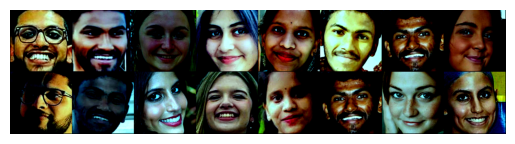

[0. 0. 1. 1. 0. 0. 1. 1.]


In [ ]:
# Create a simple dataloader just for simple visualization
# Load the training dataset
training_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training")

detector = MTCNN()

import torchvision.transforms as transforms
import PIL
from PIL import ImageOps
import numpy as np


# Resize the images, normalize, and convert to tensor
transformation = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.55313563,0.40574867, 0.3480318 ], std=[0.5215551,  0.40368503, 0.40764245]),  # Normalization
])

# Initialize the network
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset,
                                        transform=transformation)


vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        batch_size=8)

# Extract one batch
example_batch = next(iter(vis_dataloader))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same person, label is 0, same person in both images
concatenated = torch.cat((example_batch[0], example_batch[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

### RESNET - 18


Defined the SiameseNetwork using the Resnet as its initial layer as part of transfer learning, followed by the Convolution layer and fully connected layers.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models


class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        resnet18 = models.resnet18(pretrained=True)

        self.conv_layers = nn.Sequential(
            resnet18.conv1,
            resnet18.bn1,
            resnet18.relu,
            resnet18.layer1,
            resnet18.layer2,
            resnet18.layer3,
            resnet18.layer4,
        )

        # Apply Kaiming initialization to convolutional layers with ReLU activation
        for layer in self.conv_layers:
            if isinstance(layer, nn.Conv2d):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

        self.fc_layers = nn.Sequential(
            nn.Linear(512*16*16, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        # Apply Kaiming initialization to fully connected layers
        for layer in self.fc_layers:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def forward(self, input1, input2):
        x1 = self.conv_layers(input1)
        x2 = self.conv_layers(input2)

        x1 = x1.view(x1.size()[0], -1)
        x2 = x2.view(x2.size()[0], -1)

        x1 = self.fc_layers(x1)
        x2 = self.fc_layers(x2)

        return x1, x2

siamese_net = SiameseNetwork()
# Print the architecture of the mini Siamese Network
print(siamese_net)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s]


SiameseNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kerne

Contrastive Loss Function

In [ ]:
# Define the Contrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=1.2):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive


In [ ]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01 )

# Siamese Network Training Loop

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/10], Train Loss: 77051.36068780578, Val Loss: 3784.309868056769
Epoch [2/10], Train Loss: 84.72797048200658, Val Loss: 2990.812663354329
Epoch [3/10], Train Loss: 71.49486145902452, Val Loss: 2606.7570784014442
Epoch [4/10], Train Loss: 31.458497682225616, Val Loss: 3878.4909954630944
Epoch [5/10], Train Loss: 29.730124630932586, Val Loss: 1335.9194989076232
Epoch [6/10], Train Loss: 144.19461997871372, Val Loss: 45.06470995630014
Epoch [7/10], Train Loss: 6.991882801748407, Val Loss: 8.07642985323762
Epoch [8/10], Train Loss: 4.055933674214254, Val Loss: 20.81701443315647
Epoch [9/10], Train Loss: 229.0315404891574, Val Loss: 4056.7543105814543
Epoch [10/10], Train Loss: 13.56251724763415, Val Loss: 903.3655776794235


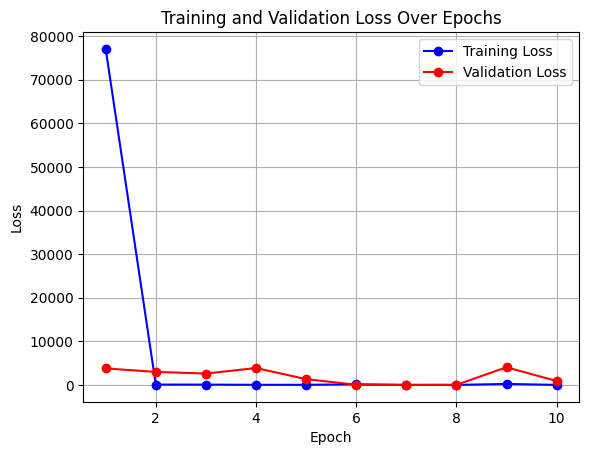

In [ ]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets

# Assuming 'training_dataset' is defined
training_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training/")

# Define your training dataset
train_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset, transform=transformation)

# Assuming 'validation_dataset' is defined
validation_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation/")

# Define your validation dataset
val_dataset = SiameseNetworkDataset(imageFolderDataset=validation_dataset, transform=transformation)

# Define your data loaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)
val_dataloader = DataLoader(val_dataset, shuffle=True, batch_size=2)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Number of epochs
num_epochs = 10  # Adjust as needed

# Initialize the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Training loop
for epoch in range(num_epochs):
    # Training phase
    net.train()
    net.cuda()
    train_loss = 0.0

    for img0, img1, label in train_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        train_loss += loss_contrastive.item()

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation phase
    net.eval()
    val_loss = 0.0

    with torch.no_grad():
        for img0, img1, label in val_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            val_loss += loss_contrastive.item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

    # Adjust learning rate based on validation loss
    scheduler.step(avg_val_loss)

# Plot the loss values
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install ray[tune]                #hyperparameter tuning library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.4 MB/s eta 0:00:00


# Siamese Network Training with Ray Tune


In [ ]:
from ray import tune
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR


def train_siamese(config):
    # Assuming you have defined train_dataloader and val_dataloader outside the function
    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation/"), transform=transformation), shuffle=True, batch_size=16)

    net = SiameseNetwork().cuda()
    #net = SiameseNetwork()

    #criterion = nn.CrossEntropyLoss()
    optimizer = SGD(net.parameters(), lr=config["lr"], momentum=config["momentum"], weight_decay=config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=config["lr_step_size"], gamma=config["lr_gamma"])

    for epoch in range(config["num_epochs"]):
        # Training loop
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            #img0, img1, label = img0, img1, label

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)

        print(f"Epoch [{epoch + 1}/{config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    return avg_val_loss


# Best configuration for the model

In [ ]:
config = {
    "lr": tune.choice([0.0001, 0.0005, 0.001]),
    "momentum": tune.uniform(0.1, 0.9),
    "weight_decay": tune.loguniform(1e-5, 1e-2),
    "lr_step_size": tune.choice([10, 20, 30]),
    "lr_gamma": tune.choice([0.1, 0.5, 0.9]),
    "num_epochs": 5
}

# Set up Ray Tune experiment
analysis = tune.run(
    train_siamese,
    config=config,
    resources_per_trial={"gpu": 1},  # Adjust based on your environment
    num_samples=5,
)

# Analyze results
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best hyperparameters: ", best_config)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-04-20 20:16:41,561	INFO worker.py:1749 -- Started a local Ray instance.
2024-04-20 20:16:42,783	INFO tune.py:263 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-04-20 20:16:42,792	INFO tune.py:633 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+----------------------------------------------------------------------+
| Configuration for experiment     train_siamese_2024-04-20_20-16-42   |
+----------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator               |
| Scheduler                        FIFOScheduler                       |
| Number of trials                 5                                   |
+----------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_siamese_2024-04-20_20-16-42
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-20_20-16-37_791712_1256/artifacts/2024-04-20_20-16-42/train_siamese_2024-04-20_20-16-42/driver_artifacts`

Trial status: 5 PENDING
Current time: 2024-04-20 20:16:43. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------

(train_siamese pid=44177) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=44177)   warnings.warn(
(train_siamese pid=44177) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=44177)   warnings.warn(msg)



Trial status: 1 RUNNING | 4 PENDING
Current time: 2024-04-20 20:17:13. Total running time: 30s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------+
| Trial name                  status         lr     momentum     weight_decay     lr_step_size     lr_gamma |
+-----------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00000   RUNNING    0.001      0.280848      0.000311696               30          0.5 |
| train_siamese_e753a_00001   PENDING    0.0001     0.787705      2.60615e-05               20          0.5 |
| train_siamese_e753a_00002   PENDING    0.0005     0.315898      0.00582696                30          0.5 |
| train_siamese_e753a_00003   PENDING    0.0001     0.67676       1.08362e-05               10          0.9 |
| train_siamese_e753a_00004   PENDING    0.0005     0.30391

(train_siamese pid=44956) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=44956)   warnings.warn(
(train_siamese pid=44956) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=44956)   warnings.warn(msg)



Trial status: 1 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2024-04-20 20:19:43. Total running time: 3min 0s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00001   RUNNING      0.0001     0.787705      2.60615e-05               20          0.5                                         |
| train_siamese_e753a_00000   TERMINATED   0.001      0.280848      0.000311696               30          0.5        1            164.397         nan |
| train_siamese_e753a_00002   PENDING      0.0005 

(train_siamese pid=45765) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=45765)   warnings.warn(
(train_siamese pid=45765) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=45765)   warnings.warn(msg)



Trial status: 2 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2024-04-20 20:22:44. Total running time: 6min 1s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00002   RUNNING      0.0005     0.315898      0.00582696                30          0.5                                          |
| train_siamese_e753a_00000   TERMINATED   0.001      0.280848      0.000311696               30          0.5        1            164.397   nan        |
| train_siamese_e753a_00001   TERMINATED   0.

(train_siamese pid=46559) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=46559)   warnings.warn(
(train_siamese pid=46559) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=46559)   warnings.warn(msg)



Trial status: 3 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-04-20 20:25:44. Total running time: 9min 1s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00003   RUNNING      0.0001     0.67676       1.08362e-05               10          0.9                                          |
| train_siamese_e753a_00000   TERMINATED   0.001      0.280848      0.000311696               30          0.5        1            164.397   nan        |
| train_siamese_e753a_00001   TERMINATED   0.

(train_siamese pid=47367) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=47367)   warnings.warn(
(train_siamese pid=47367) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=47367)   warnings.warn(msg)



Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2024-04-20 20:28:44. Total running time: 12min 1s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00004   RUNNING      0.0005     0.30391       0.000351208               20          0.5                                          |
| train_siamese_e753a_00000   TERMINATED   0.001      0.280848      0.000311696               30          0.5        1            164.397   nan        |
| train_siamese_e753a_00001   TERMINATED   0.0001     0.

2024-04-20 20:31:15,288	INFO tune.py:1021 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_siamese_2024-04-20_20-16-42' in 0.0098s.
2024-04-20 20:31:15,309	WARNING experiment_analysis.py:568 -- Could not find best trial. Did you pass the correct `metric` parameter?


Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2024-04-20 20:31:15. Total running time: 14min 32s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_e753a_00004   RUNNING      0.0005     0.30391       0.000351208               20          0.5                                          |
| train_siamese_e753a_00000   TERMINATED   0.001      0.280848      0.000311696               30          0.5        1            164.397   nan        |
| train_siamese_e753a_00001   TERMINATED   0.0001     0.

In [ ]:
!nvidia-smi
# Check for GPU
import tensorflow as tf
print("Number of GPUs available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Sun Apr 21 02:15:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              41W / 300W |    324MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os

num_cpus = os.cpu_count()
print(f"Number of CPUs: {num_cpus}")


Number of CPUs: 2


In [ ]:
torch.cuda.is_available()

True

# Training with Best Configuration parameters

In [ ]:
def train_siamese_with_best_config():
    # Use the best configuration obtained from Ray Tune
    best_config = {"lr": 0.0001, "momentum": 0.201382, "weight_decay": 0.000252476, "lr_step_size": 10, "lr_gamma": 0.1, "num_epochs": 20}

    # Initialize your Siamese Network
    net = SiameseNetwork().cuda()

    # Define your optimizer and scheduler with the best configuration
    optimizer = optim.SGD(net.parameters(), lr=best_config["lr"], momentum=best_config["momentum"], weight_decay=best_config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=best_config["lr_step_size"], gamma=best_config["lr_gamma"])

    # Define your loss function
    criterion = ContrastiveLoss()

    # Training loop
    train_losses = []
    val_losses = []

    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation/"), transform=transformation), shuffle=True, batch_size=16)

    for epoch in range(best_config["num_epochs"]):
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch + 1}/{best_config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    # Save or use the trained model as needed
    torch.save(net.state_dict(), "siamese_model.pth")

    return train_losses, val_losses

# Train with the best configuration and get losses
train_losses, val_losses = train_siamese_with_best_config()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 3.5540034119729644, Val Loss: 0.518463933840394
Epoch [2/20], Train Loss: 0.5763873493781796, Val Loss: 0.42952372692525387
Epoch [3/20], Train Loss: 0.4625730801511694, Val Loss: 0.4156297314912081
Epoch [4/20], Train Loss: 0.4375593049658669, Val Loss: 0.4024212285876274
Epoch [5/20], Train Loss: 0.4452028136562418, Val Loss: 0.43324041925370693
Epoch [6/20], Train Loss: 0.3956341450964963, Val Loss: 0.38159991428256035
Epoch [7/20], Train Loss: 0.4041864976838783, Val Loss: 0.4161711521446705
Epoch [8/20], Train Loss: 0.36744839173776134, Val Loss: 0.42335084825754166
Epoch [9/20], Train Loss: 0.37929815854187365, Val Loss: 0.3909803293645382
Epoch [10/20], Train Loss: 0.32763768042679187, Val Loss: 0.38954874500632286
Epoch [11/20], Train Loss: 0.34006826883112945, Val Loss: 0.3713224194943905
Epoch [12/20], Train Loss: 0.31668787490990424, Val Loss: 0.4235193654894829
Epoch [13/20], Train Loss: 0.3234982565045357, Val Loss: 0.3645566813647747
Epoch [14/20

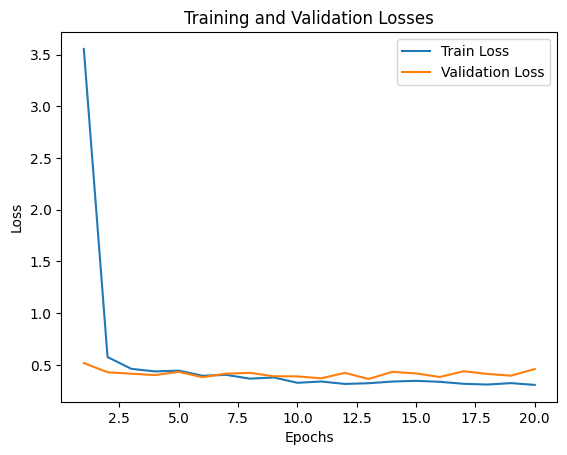

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Testing Siamese Network Model

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Assuming you have a test dataloader defined
test_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training"), transform=transformation), shuffle=True, batch_size=16)

# Load the saved model
saved_model_path = "siamese_model.pth"
siamese_net = SiameseNetwork().cuda()
siamese_net.load_state_dict(torch.load(saved_model_path))
siamese_net.eval()

# Assuming you have defined your loss function
criterion = ContrastiveLoss()

# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
test_loss = 0.0

with torch.no_grad():
    for img0, img1, label in test_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = siamese_net(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()
        total_samples += label.size(0)

        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        test_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions*10 / total_samples

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Test Loss: 0.30033628504585336, Test Accuracy: 75.25205158264947


# Defining Mini Siamese Network on a smaller dataset

Created the small dataset for overfitting the model

In [ ]:
# Load the training dataset
training_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training")

detector = MTCNN()

import torchvision.transforms as transforms
import PIL
from PIL import ImageOps
import numpy as np


# Resize the images, normalize, and convert to tensor
transformation = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.5600066,0.412247,0.35851818], std=[0.51654744,0.40185937,0.40663293]),  # Normalization
])

# Initialize the network
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset,
                                        transform=transformation)


## Dataloader to visualize the sample

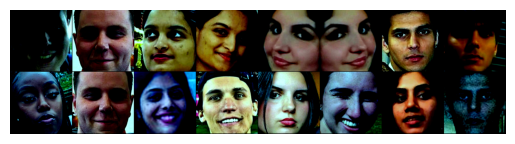

[1. 0. 1. 1. 0. 1. 1. 0.]


In [ ]:
# Create a simple dataloader just for simple visualization
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        batch_size=8)

# Extract one batch
example_batch = next(iter(vis_dataloader))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same person, label is 0, same person in both images
concatenated = torch.cat((example_batch[0], example_batch[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class MiniSiameseNetwork(nn.Module):
    def __init__(self):
        super(MiniSiameseNetwork, self).__init__()

        # Load a pre-trained ResNet18 model
        resnet18 = models.resnet18(pretrained=True)

        # Extract only the first two layers
        self.conv_layers = nn.Sequential(
            resnet18.conv1,
            resnet18.bn1,
        )

        # Fully connected layers for similarity comparison
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 112 * 112, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        # Apply Kaiming initialization to fully connected layers
        for layer in self.fc_layers:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def forward(self, input1, input2):
        x1 = self.conv_layers(input1)
        x2 = self.conv_layers(input2)

        x1 = x1.view(x1.size()[0], -1)
        x2 = x2.view(x2.size()[0], -1)

        x1 = self.fc_layers(x1)
        x2 = self.fc_layers(x2)

        return x1, x2

# Example usage:
mini_siamese_net = MiniSiameseNetwork()

# Print the architecture of the mini Siamese Network
print(mini_siamese_net)


MiniSiameseNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=802816, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [ ]:
# Define the Contrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=1.2):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive

In [ ]:
import torch
net = MiniSiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01 )

In [ ]:
from ray import tune
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR


def train_siamese(config):
    # Assuming you have defined train_dataloader and val_dataloader outside the function
    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/validation/"), transform=transformation), shuffle=True, batch_size=16)

    net = SiameseNetwork().cuda()
    #net = SiameseNetwork()

    #criterion = nn.CrossEntropyLoss()
    optimizer = SGD(net.parameters(), lr=config["lr"], momentum=config["momentum"], weight_decay=config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=config["lr_step_size"], gamma=config["lr_gamma"])

    for epoch in range(config["num_epochs"]):
        # Training loop
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            #img0, img1, label = img0, img1, label

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)

        print(f"Epoch [{epoch + 1}/{config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    return avg_val_loss


In [ ]:
config = {
    "lr": tune.choice([0.0001, 0.0005, 0.001]),
    "momentum": tune.uniform(0.1, 0.9),
    "weight_decay": tune.loguniform(1e-5, 1e-2),
    "lr_step_size": tune.choice([10, 20, 30]),
    "lr_gamma": tune.choice([0.1, 0.5, 0.9]),
    "num_epochs": 5
}

# Set up Ray Tune experiment
analysis = tune.run(
    train_siamese,
    config=config,
    resources_per_trial={"gpu": 1},  # Adjust based on your environment
    num_samples=5,
)

# Analyze results
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best hyperparameters: ", best_config)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-04-21 02:17:11,365	INFO worker.py:1749 -- Started a local Ray instance.
2024-04-21 02:17:12,292	INFO tune.py:263 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-04-21 02:17:12,296	INFO tune.py:633 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+----------------------------------------------------------------------+
| Configuration for experiment     train_siamese_2024-04-21_02-17-12   |
+----------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator               |
| Scheduler                        FIFOScheduler                       |
| Number of trials                 5                                   |
+----------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_siamese_2024-04-21_02-17-12
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-21_02-17-08_870425_176/artifacts/2024-04-21_02-17-12/train_siamese_2024-04-21_02-17-12/driver_artifacts`

Trial status: 5 PENDING
Current time: 2024-04-21 02:17:12. Total running time: 0s
Logical resource usage: 0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:V100)
+------------------------------------------------

(train_siamese pid=2184) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=2184)   warnings.warn(
(train_siamese pid=2184) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=2184)   warnings.warn(msg)



Trial status: 1 RUNNING | 4 PENDING
Current time: 2024-04-21 02:17:42. Total running time: 30s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------+
| Trial name                  status         lr     momentum     weight_decay     lr_step_size     lr_gamma |
+-----------------------------------------------------------------------------------------------------------+
| train_siamese_43803_00000   RUNNING    0.001      0.566117      0.000904457               20          0.9 |
| train_siamese_43803_00001   PENDING    0.0005     0.368709      7.85272e-05               30          0.5 |
| train_siamese_43803_00002   PENDING    0.0005     0.277334      0.000105782               10          0.1 |
| train_siamese_43803_00003   PENDING    0.0001     0.42589       0.00221008                30          0.9 |
| train_siamese_43803_00004   PENDING    0.0005     0.107

(train_siamese pid=2785) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=2785)   warnings.warn(
(train_siamese pid=2785) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=2785)   warnings.warn(msg)


(train_siamese pid=2785) Epoch [1/5], Train Loss: 50.38035295009613, Val Loss: 5.350648760795593
(train_siamese pid=2785) Epoch [2/5], Train Loss: 1.8403362482786179, Val Loss: 0.6756117790937424
(train_siamese pid=2785) Epoch [3/5], Train Loss: 0.5658651113510131, Val Loss: 0.41697484254837036
(train_siamese pid=2785) Epoch [4/5], Train Loss: 0.41763286739587785, Val Loss: 0.4529896453022957

Trial train_siamese_43803_00001 finished iteration 1 at 2024-04-21 02:19:40. Total running time: 2min 28s
+----------------------------------------------------+
| Trial train_siamese_43803_00001 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                            20.333 |
| time_total_s                                20.333 |
| training_iteration                               1 |
| _metric                                    0.73439 |
+----------------------------------------------------+

T

(train_siamese pid=2935) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=2935)   warnings.warn(
(train_siamese pid=2935) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=2935)   warnings.warn(msg)


(train_siamese pid=2935) Epoch [1/5], Train Loss: 72.45256831645966, Val Loss: 4.44277685880661
(train_siamese pid=2935) Epoch [2/5], Train Loss: 3.617445158958435, Val Loss: 0.7488181591033936
(train_siamese pid=2935) Epoch [3/5], Train Loss: 1.0198161542415618, Val Loss: 0.6546167507767677
(train_siamese pid=2935) Epoch [4/5], Train Loss: 0.5131444215774537, Val Loss: 0.46952226758003235

Trial train_siamese_43803_00002 finished iteration 1 at 2024-04-21 02:20:05. Total running time: 2min 53s
+----------------------------------------------------+
| Trial train_siamese_43803_00002 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           20.1176 |
| time_total_s                               20.1176 |
| training_iteration                               1 |
| _metric                                    0.39403 |
+----------------------------------------------------+

Tria

(train_siamese pid=3088) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=3088)   warnings.warn(
(train_siamese pid=3088) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=3088)   warnings.warn(msg)



Trial status: 3 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-04-21 02:20:12. Total running time: 3min 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_43803_00003   RUNNING      0.0001     0.42589       0.00221008                30          0.9                                          |
| train_siamese_43803_00000   TERMINATED   0.001      0.566117      0.000904457               20          0.9        1           118.232    nan        |
| train_siamese_43803_00001   TERMINATED   

(train_siamese pid=3241) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=3241)   warnings.warn(
(train_siamese pid=3241) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=3241)   warnings.warn(msg)


(train_siamese pid=3241) Epoch [1/5], Train Loss: 21.917722845077513, Val Loss: 5.487929999828339

Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2024-04-21 02:20:42. Total running time: 3min 30s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)      _metric |
+------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_43803_00004   RUNNING      0.0005     0.107398      0.000897889               10          0.9                                          |
| train_siamese_43803_00000   TERMINATED   0.001      0.566117      0.000904457               20          0.9

2024-04-21 02:20:55,656	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-04-21 02:20:55,658	INFO tune.py:1021 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_siamese_2024-04-21_02-17-12' in 0.0056s.
2024-04-21 02:20:55,676	WARNING experiment_analysis.py:568 -- Could not find best trial. Did you pass the correct `metric` parameter?



Trial train_siamese_43803_00004 finished iteration 1 at 2024-04-21 02:20:55. Total running time: 3min 43s
+----------------------------------------------------+
| Trial train_siamese_43803_00004 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           20.1159 |
| time_total_s                               20.1159 |
| training_iteration                               1 |
| _metric                                    0.43878 |
+----------------------------------------------------+

Trial train_siamese_43803_00004 completed after 1 iterations at 2024-04-21 02:20:55. Total running time: 3min 43s

Trial status: 5 TERMINATED
Current time: 2024-04-21 02:20:55. Total running time: 3min 43s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------

In [ ]:
def train_siamese_with_best_config():
    # Use the best configuration obtained from Ray Tune
    best_config = {"lr": 0.0001, "momentum": 0.277334, "weight_decay": 0.000105782, "lr_step_size": 10, "lr_gamma": 0.1, "num_epochs": 20}

    # Initialize your Siamese Network
    net = SiameseNetwork().cuda()

    # Define your optimizer and scheduler with the best configuration
    optimizer = optim.SGD(net.parameters(), lr=best_config["lr"], momentum=best_config["momentum"], weight_decay=best_config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=best_config["lr_step_size"], gamma=best_config["lr_gamma"])

    # Define your loss function
    criterion = ContrastiveLoss()

    # Training loop
    train_losses = []
    val_losses = []

    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/validation/"), transform=transformation), shuffle=True, batch_size=16)

    for epoch in range(best_config["num_epochs"]):
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch + 1}/{best_config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    # Save or use the trained model as needed
    torch.save(net.state_dict(), "siamese_model.pth")

    return train_losses, val_losses

# Train with the best configuration and get losses
train_losses, val_losses = train_siamese_with_best_config()

Epoch [1/20], Train Loss: 12.947418260574342, Val Loss: 2.531118929386139
Epoch [2/20], Train Loss: 8.385318565368653, Val Loss: 1.3834578916430473
Epoch [3/20], Train Loss: 3.011457598209381, Val Loss: 1.7538945227861404
Epoch [4/20], Train Loss: 1.8147815942764283, Val Loss: 1.1441104710102081
Epoch [5/20], Train Loss: 1.5159430146217345, Val Loss: 0.7721929512917995
Epoch [6/20], Train Loss: 0.9997344791889191, Val Loss: 0.5063721165060997
Epoch [7/20], Train Loss: 0.8667287051677703, Val Loss: 0.47787635773420334
Epoch [8/20], Train Loss: 0.5672591835260391, Val Loss: 0.7249350249767303
Epoch [9/20], Train Loss: 0.550035884976387, Val Loss: 0.5717559307813644
Epoch [10/20], Train Loss: 0.4953632354736328, Val Loss: 0.8132191970944405
Epoch [11/20], Train Loss: 0.6326813280582428, Val Loss: 0.4167567491531372
Epoch [12/20], Train Loss: 0.6993775069713593, Val Loss: 0.6074176728725433
Epoch [13/20], Train Loss: 0.48720732927322385, Val Loss: 0.5930853635072708
Epoch [14/20], Train Lo

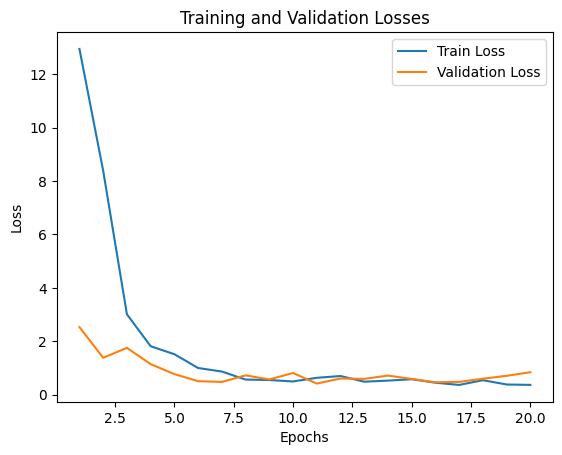

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
test_loss = 0.0
siamese_net = siamese_net.cuda()
test_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/MyDrive/processed_image/small_dataset/testing"), transform=transformation), shuffle=True, batch_size=16)

# Iterate through the test dataset
with torch.no_grad():
    for img0, img1, label in test_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = siamese_net(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()  # Increment correct predictions
        total_samples += label.size(0)  # Increment total samples
        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        test_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
total_samples = total_samples*10                 #6 folders with each 10 images totalling 600 coombinations
avg_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions / total_samples *100 # Corrected test accuracy calculation
print("Correct Prediction count: ", correct_predictions, "Total Sample Count: ", total_samples)

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Correct Prediction count:  508 Total Sample Count:  600
Test Loss: 6.331125497817993, Test Accuracy: 84.66666666666667


In [ ]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
train_loss = 0.0

train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training"), transform=transformation), shuffle=True, batch_size=2)

with torch.no_grad():
    for img0, img1, label in train_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = siamese_net(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()
        total_samples += label.size(0)

        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        train_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
avg_test_loss = train_loss / len(train_dataloader)
test_accuracy = correct_predictions / total_samples*100
print("Correct Prediction count: ",correct_predictions, "Total Sample Count: ", total_samples)

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Correct Prediction count:  136 Total Sample Count:  150
Test Loss: 3.8469380309681096, Test Accuracy: 90.66666666666666


# RESNET - 50


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        resnet50 = models.resnet50(pretrained=True)

        self.conv_layers = nn.Sequential(
            resnet50.conv1,
            resnet50.bn1,
            resnet50.relu,
            resnet50.maxpool,
            resnet50.layer1,
            resnet50.layer2,
            resnet50.layer3,
            resnet50.layer4
        )

        # Apply Kaiming initialization to convolutional layers with ReLU activation
        for layer in self.conv_layers:
            if isinstance(layer, nn.Conv2d):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

        self.fc_layers = nn.Sequential(
            nn.Linear(512*16*16, 256),  # Adjusted input size due to ResNet-50
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        # Apply Kaiming initialization to fully connected layers
        for layer in self.fc_layers:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def forward(self, input1, input2):
        x1 = self.conv_layers(input1)
        x2 = self.conv_layers(input2)

        x1 = x1.view(x1.size()[0], -1)
        x2 = x2.view(x2.size()[0], -1)

        x1 = self.fc_layers(x1)
        x2 = self.fc_layers(x2)

        return x1, x2

# Create an instance of the SiameseNetwork with ResNet-50 architecture
siamese_net_resnet50 = SiameseNetwork()

# Print the architecture of the Siamese Network with ResNet-50
print(siamese_net_resnet50)


SiameseNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): 

In [ ]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01 )

Epoch [1/10], Train Loss: 13733.431584797198, Val Loss: 250.1354273714262
Epoch [2/10], Train Loss: 14.860710422205248, Val Loss: 102.96973284640077
Epoch [3/10], Train Loss: 5.61825585933229, Val Loss: 55.02421086482905
Epoch [4/10], Train Loss: 6.418297400063604, Val Loss: 680.1741892191797
Epoch [5/10], Train Loss: 4.114773639576488, Val Loss: 493.63626853303066
Epoch [6/10], Train Loss: 3.3243638944058684, Val Loss: 91.57844400576045
Epoch [7/10], Train Loss: 3.8608761437876047, Val Loss: 197.52121576354438
Epoch [8/10], Train Loss: 1.5349318914353167, Val Loss: 290.3292529849455
Epoch [9/10], Train Loss: 1.2180579176020074, Val Loss: 230.16241258866546
Epoch [10/10], Train Loss: 0.5959918446524025, Val Loss: 55.43614724852469


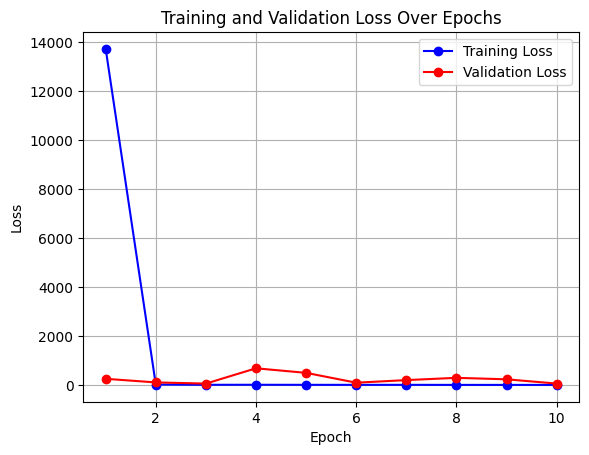

In [ ]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets

# Assuming 'training_dataset' is defined
training_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training/")

# Define your training dataset
train_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset, transform=transformation)

# Assuming 'validation_dataset' is defined
validation_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation/")

# Define your validation dataset
val_dataset = SiameseNetworkDataset(imageFolderDataset=validation_dataset, transform=transformation)

# Define your data loaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)
val_dataloader = DataLoader(val_dataset, shuffle=True, batch_size=2)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Number of epochs
num_epochs = 10  # Adjust as needed

# Initialize the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Training loop
for epoch in range(num_epochs):
    # Training phase
    net.train()
    net.cuda()
    train_loss = 0.0

    for img0, img1, label in train_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        train_loss += loss_contrastive.item()

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation phase
    net.eval()
    val_loss = 0.0

    with torch.no_grad():
        for img0, img1, label in val_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            val_loss += loss_contrastive.item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

    # Adjust learning rate based on validation loss
    scheduler.step(avg_val_loss)

# Plot the loss values
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
config = {
    "lr": tune.choice([0.0001, 0.0005, 0.001]),
    "momentum": tune.uniform(0.1, 0.9),
    "weight_decay": tune.loguniform(1e-5, 1e-2),
    "lr_step_size": tune.choice([10, 20, 30]),
    "lr_gamma": tune.choice([0.1, 0.5, 0.9]),
    "num_epochs": 5
}

# Set up Ray Tune experiment
analysis = tune.run(
    train_siamese,
    config=config,
    resources_per_trial={"gpu": 1},  # Adjust based on your environment
    num_samples=5,
)

# Analyze results
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best hyperparameters: ", best_config)

2024-04-21 03:49:23,584	INFO tune.py:633 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+----------------------------------------------------------------------+
| Configuration for experiment     train_siamese_2024-04-21_03-49-23   |
+----------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator               |
| Scheduler                        FIFOScheduler                       |
| Number of trials                 5                                   |
+----------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_siamese_2024-04-21_03-49-23
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-21_02-17-08_870425_176/artifacts/2024-04-21_03-49-23/train_siamese_2024-04-21_03-49-23/driver_artifacts`

Trial status: 5 PENDING
Current time: 2024-04-21 03:49:23. Total running time: 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+----------------------------------------------

(train_siamese pid=25895) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=25895)   warnings.warn(
(train_siamese pid=25895) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=25895)   warnings.warn(msg)


(train_siamese pid=25895) Epoch [1/5], Train Loss: 4.041104732453823, Val Loss: 0.6613863930106163
(train_siamese pid=25895) Epoch [2/5], Train Loss: 2.3626557648181916, Val Loss: 0.5140533223748207
(train_siamese pid=25895) Epoch [3/5], Train Loss: 0.6538089036941528, Val Loss: 0.4768376797437668
(train_siamese pid=25895) Epoch [4/5], Train Loss: 0.5408712744712829, Val Loss: 0.47489171475172043

Trial train_siamese_24671_00000 finished iteration 1 at 2024-04-21 03:49:49. Total running time: 25s
+----------------------------------------------------+
| Trial train_siamese_24671_00000 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           21.1546 |
| time_total_s                               21.1546 |
| training_iteration                               1 |
| _metric                                    0.40106 |
+----------------------------------------------------+

Tr

(train_siamese pid=26046) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=26046)   warnings.warn(
(train_siamese pid=26046) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=26046)   warnings.warn(msg)


(train_siamese pid=26046) Epoch [1/5], Train Loss: 1.6323742538690567, Val Loss: 0.8741381615400314
(train_siamese pid=26046) Epoch [2/5], Train Loss: 1.2367741167545319, Val Loss: 0.8508074283599854
(train_siamese pid=26046) Epoch [3/5], Train Loss: 0.795594921708107, Val Loss: 0.5250754877924919
(train_siamese pid=26046) Epoch [4/5], Train Loss: 0.6666394174098969, Val Loss: 0.4256913885474205

Trial train_siamese_24671_00001 finished iteration 1 at 2024-04-21 03:50:14. Total running time: 51s
+----------------------------------------------------+
| Trial train_siamese_24671_00001 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           21.1758 |
| time_total_s                               21.1758 |
| training_iteration                               1 |
| _metric                                    0.39159 |
+----------------------------------------------------+

Tri

(train_siamese pid=26203) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=26203)   warnings.warn(
(train_siamese pid=26203) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=26203)   warnings.warn(msg)



Trial status: 2 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2024-04-21 03:50:23. Total running time: 1min 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_24671_00002   RUNNING      0.0001     0.162293      0.000145202               30          0.9                                         |
| train_siamese_24671_00000   TERMINATED   0.0005     0.342047      8.52253e-05               30          0.1        1            21.1546    0.401058 |
| train_siamese_24671_00001   TERMINATED   0.000

(train_siamese pid=26363) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=26363)   warnings.warn(
(train_siamese pid=26363) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=26363)   warnings.warn(msg)


(train_siamese pid=26363) Epoch [1/5], Train Loss: 7.4867160558700565, Val Loss: 4.139954924583435

Trial status: 3 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-04-21 03:50:53. Total running time: 1min 30s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_24671_00003   RUNNING      0.0005     0.819469      1.22062e-05               30          0.9                                         |
| train_siamese_24671_00000   TERMINATED   0.0005     0.342047      8.52253e-05               30    

(train_siamese pid=26520) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=26520)   warnings.warn(
(train_siamese pid=26520) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=26520)   warnings.warn(msg)


(train_siamese pid=26520) Epoch [1/5], Train Loss: 8.06288190484047, Val Loss: 13.344428896903992
(train_siamese pid=26520) Epoch [2/5], Train Loss: 3.540901502966881, Val Loss: 1.0300730913877487

Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2024-04-21 03:51:24. Total running time: 2min 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_24671_00004   RUNNING      0.0005     0.771639      0.000267688               20          0.1                                         |
| train_siamese

2024-04-21 03:51:33,887	INFO tune.py:1021 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_siamese_2024-04-21_03-49-23' in 0.0057s.
2024-04-21 03:51:33,900	WARNING experiment_analysis.py:568 -- Could not find best trial. Did you pass the correct `metric` parameter?



Trial train_siamese_24671_00004 finished iteration 1 at 2024-04-21 03:51:33. Total running time: 2min 10s
+----------------------------------------------------+
| Trial train_siamese_24671_00004 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           21.0266 |
| time_total_s                               21.0266 |
| training_iteration                               1 |
| _metric                                    0.40416 |
+----------------------------------------------------+

Trial train_siamese_24671_00004 completed after 1 iterations at 2024-04-21 03:51:33. Total running time: 2min 10s

Trial status: 5 TERMINATED
Current time: 2024-04-21 03:51:33. Total running time: 2min 10s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------

In [ ]:
def train_siamese_with_best_config():
    # Use the best configuration obtained from Ray Tune
    best_config = {"lr": 0.0001, "momentum": 0.536346, "weight_decay": 0.000343397, "lr_step_size": 10, "lr_gamma": 0.1, "num_epochs": 20}

    # Initialize your Siamese Network
    net = SiameseNetwork().cuda()

    # Define your optimizer and scheduler with the best configuration
    optimizer = optim.SGD(net.parameters(), lr=best_config["lr"], momentum=best_config["momentum"], weight_decay=best_config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=best_config["lr_step_size"], gamma=best_config["lr_gamma"])

    # Define your loss function
    criterion = ContrastiveLoss()

    # Training loop
    train_losses = []
    val_losses = []

    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation/"), transform=transformation), shuffle=True, batch_size=16)

    for epoch in range(best_config["num_epochs"]):
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch + 1}/{best_config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    # Save or use the trained model as needed
    torch.save(net.state_dict(), "siamese_model_resnet_50.pth")

    return train_losses, val_losses

# Train with the best configuration and get losses
train_losses, val_losses = train_siamese_with_best_config()

Epoch [1/20], Train Loss: 0.9155739912832225, Val Loss: 0.527245195582509
Epoch [2/20], Train Loss: 0.4927933000855976, Val Loss: 0.4629056267440319
Epoch [3/20], Train Loss: 0.423348695591644, Val Loss: 0.3437608368694782
Epoch [4/20], Train Loss: 0.41703802485156943, Val Loss: 0.37232258170843124
Epoch [5/20], Train Loss: 0.43015608605411315, Val Loss: 0.4850046709179878
Epoch [6/20], Train Loss: 0.4138223010080832, Val Loss: 0.3871972896158695
Epoch [7/20], Train Loss: 0.3982143093038488, Val Loss: 0.43671223148703575
Epoch [8/20], Train Loss: 0.4047693094169652, Val Loss: 0.40725551173090935
Epoch [9/20], Train Loss: 0.35414554482256927, Val Loss: 0.41942303627729416
Epoch [10/20], Train Loss: 0.33771953069501454, Val Loss: 0.38053599186241627
Epoch [11/20], Train Loss: 0.3515364872636618, Val Loss: 0.43650565668940544
Epoch [12/20], Train Loss: 0.3354749227011645, Val Loss: 0.3709935136139393
Epoch [13/20], Train Loss: 0.3326630581308294, Val Loss: 0.47922898456454277
Epoch [14/20

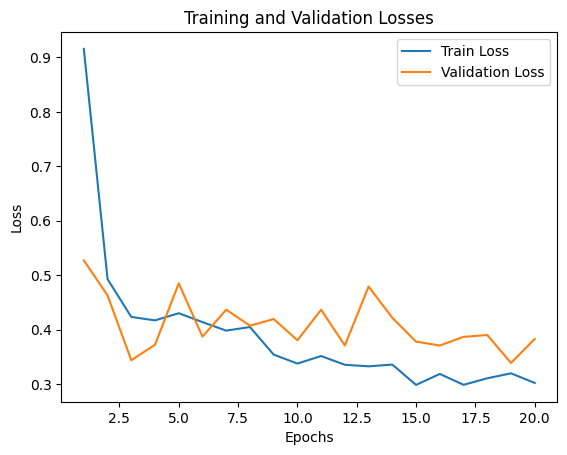

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Assuming you have a test dataloader defined
test_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/training/training"), transform=transformation), shuffle=True, batch_size=16)

# Load the saved model
saved_model_path = "siamese_model_resnet_50.pth"
siamese_net = SiameseNetwork().cuda()
siamese_net.load_state_dict(torch.load(saved_model_path))
siamese_net.eval()

# Assuming you have defined your loss function
criterion = ContrastiveLoss()

# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
test_loss = 0.0

with torch.no_grad():
    for img0, img1, label in test_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = siamese_net(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()
        total_samples += label.size(0)

        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        test_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions*10 / total_samples

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Test Loss: 0.2954420546690623, Test Accuracy: 78.06565064478312


## On a Smaller Dataset

In [ ]:
# Load the training dataset
training_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training")

detector = MTCNN()

import torchvision.transforms as transforms
import PIL
from PIL import ImageOps
import numpy as np


# Resize the images, normalize, and convert to tensor
transformation = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.5600066,0.412247,0.35851818], std=[0.51654744,0.40185937,0.40663293]),  # Normalization
])

# Initialize the network
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset,
                                        transform=transformation)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class MiniSiameseNetwork(nn.Module):
    def __init__(self):
        super(MiniSiameseNetwork, self).__init__()

        # Load a pre-trained ResNet18 model
        resnet50 = models.resnet50(pretrained=True)

        # Extract only the first two layers
        self.conv_layers = nn.Sequential(
            resnet50.conv1,
            resnet50.bn1,
        )

        # Fully connected layers for similarity comparison
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 112 * 112, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        # Apply Kaiming initialization to fully connected layers
        for layer in self.fc_layers:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def forward(self, input1, input2):
        x1 = self.conv_layers(input1)
        x2 = self.conv_layers(input2)

        x1 = x1.view(x1.size()[0], -1)
        x2 = x2.view(x2.size()[0], -1)

        x1 = self.fc_layers(x1)
        x2 = self.fc_layers(x2)

        return x1, x2

# Example usage:
mini_siamese_net = MiniSiameseNetwork()

# Print the architecture of the mini Siamese Network
print(mini_siamese_net)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MiniSiameseNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=802816, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [ ]:
import torch
net = MiniSiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01 )

In [ ]:
from ray import tune
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR


def train_siamese(config):
    # Assuming you have defined train_dataloader and val_dataloader outside the function
    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/validation/"), transform=transformation), shuffle=True, batch_size=16)

    net = SiameseNetwork().cuda()
    #net = SiameseNetwork()

    #criterion = nn.CrossEntropyLoss()
    optimizer = SGD(net.parameters(), lr=config["lr"], momentum=config["momentum"], weight_decay=config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=config["lr_step_size"], gamma=config["lr_gamma"])

    for epoch in range(config["num_epochs"]):
        # Training loop
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            #img0, img1, label = img0, img1, label

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)

        print(f"Epoch [{epoch + 1}/{config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    return avg_val_loss


In [ ]:
config = {
    "lr": tune.choice([0.0001, 0.0005, 0.001]),
    "momentum": tune.uniform(0.1, 0.9),
    "weight_decay": tune.loguniform(1e-5, 1e-2),
    "lr_step_size": tune.choice([10, 20, 30]),
    "lr_gamma": tune.choice([0.1, 0.5, 0.9]),
    "num_epochs": 5
}

# Set up Ray Tune experiment
analysis = tune.run(
    train_siamese,
    config=config,
    resources_per_trial={"gpu": 1},  # Adjust based on your environment
    num_samples=5,
)

# Analyze results
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best hyperparameters: ", best_config)

2024-04-21 05:02:27,263	INFO tune.py:633 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+----------------------------------------------------------------------+
| Configuration for experiment     train_siamese_2024-04-21_05-02-27   |
+----------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator               |
| Scheduler                        FIFOScheduler                       |
| Number of trials                 5                                   |
+----------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_siamese_2024-04-21_05-02-27
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-21_02-17-08_870425_176/artifacts/2024-04-21_05-02-27/train_siamese_2024-04-21_05-02-27/driver_artifacts`

Trial status: 5 PENDING
Current time: 2024-04-21 05:02:27. Total running time: 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+----------------------------------------------

(train_siamese pid=44998) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=44998)   warnings.warn(
(train_siamese pid=44998) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=44998)   warnings.warn(msg)


(train_siamese pid=44998) Epoch [1/5], Train Loss: 2.1160683214664457, Val Loss: 1.1957068294286728
(train_siamese pid=44998) Epoch [2/5], Train Loss: 2.7364496886730194, Val Loss: 0.5563442409038544
(train_siamese pid=44998) Epoch [3/5], Train Loss: 0.7605510219931603, Val Loss: 0.4432464614510536
(train_siamese pid=44998) Epoch [4/5], Train Loss: 0.46326762437820435, Val Loss: 0.36491599306464195

Trial train_siamese_5946f_00000 finished iteration 1 at 2024-04-21 05:02:52. Total running time: 25s
+----------------------------------------------------+
| Trial train_siamese_5946f_00000 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           20.6257 |
| time_total_s                               20.6257 |
| training_iteration                               1 |
| _metric                                    0.42084 |
+----------------------------------------------------+



(train_siamese pid=45149) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=45149)   warnings.warn(
(train_siamese pid=45149) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=45149)   warnings.warn(msg)


(train_siamese pid=45149) Epoch [1/5], Train Loss: 7.371718215942383, Val Loss: 11.959829568862915
(train_siamese pid=45149) Epoch [2/5], Train Loss: 6.653165316581726, Val Loss: 0.4720810428261757
(train_siamese pid=45149) Epoch [3/5], Train Loss: 0.48238285183906554, Val Loss: 0.37998049333691597
(train_siamese pid=45149) Epoch [4/5], Train Loss: 0.40235411524772646, Val Loss: 0.3746997267007828

Trial train_siamese_5946f_00001 finished iteration 1 at 2024-04-21 05:03:18. Total running time: 51s
+----------------------------------------------------+
| Trial train_siamese_5946f_00001 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           21.4519 |
| time_total_s                               21.4519 |
| training_iteration                               1 |
| _metric                                    0.52111 |
+----------------------------------------------------+
(t

(train_siamese pid=45308) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=45308)   warnings.warn(
(train_siamese pid=45308) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=45308)   warnings.warn(msg)



Trial status: 2 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2024-04-21 05:03:27. Total running time: 1min 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_5946f_00002   RUNNING      0.001      0.545918      0.00884105                10          0.1                                         |
| train_siamese_5946f_00000   TERMINATED   0.0005     0.270909      2.58262e-05               10          0.5        1            20.6257    0.42084  |
| train_siamese_5946f_00001   TERMINATED   0.000

(train_siamese pid=45460) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=45460)   warnings.warn(
(train_siamese pid=45460) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=45460)   warnings.warn(msg)


(train_siamese pid=45460) Epoch [1/5], Train Loss: 0.8714757025241852, Val Loss: 0.5786054655909538

Trial status: 3 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-04-21 05:03:57. Total running time: 1min 30s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_5946f_00003   RUNNING      0.0001     0.258161      5.2737e-05                10          0.1                                         |
| train_siamese_5946f_00000   TERMINATED   0.0005     0.270909      2.58262e-05               10   

(train_siamese pid=45619) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_siamese pid=45619)   warnings.warn(
(train_siamese pid=45619) /usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
(train_siamese pid=45619)   warnings.warn(msg)


(train_siamese pid=45619) Epoch [1/5], Train Loss: 5.572296237945556, Val Loss: 5.306935667991638
(train_siamese pid=45619) Epoch [2/5], Train Loss: 7.446908736228943, Val Loss: 4.292896151542664

Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2024-04-21 05:04:27. Total running time: 2min 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  status           lr     momentum     weight_decay     lr_step_size     lr_gamma     iter     total time (s)     _metric |
+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| train_siamese_5946f_00004   RUNNING      0.0005     0.803442      0.000194455               20          0.9                                         |
| train_siamese_

2024-04-21 05:04:36,291	INFO tune.py:1021 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_siamese_2024-04-21_05-02-27' in 0.0048s.
2024-04-21 05:04:36,305	WARNING experiment_analysis.py:568 -- Could not find best trial. Did you pass the correct `metric` parameter?



Trial train_siamese_5946f_00004 finished iteration 1 at 2024-04-21 05:04:36. Total running time: 2min 8s
+----------------------------------------------------+
| Trial train_siamese_5946f_00004 result             |
+----------------------------------------------------+
| checkpoint_dir_name                                |
| time_this_iter_s                           20.9143 |
| time_total_s                               20.9143 |
| training_iteration                               1 |
| _metric                                    0.45386 |
+----------------------------------------------------+

Trial train_siamese_5946f_00004 completed after 1 iterations at 2024-04-21 05:04:36. Total running time: 2min 8s

Trial status: 5 TERMINATED
Current time: 2024-04-21 05:04:36. Total running time: 2min 9s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:V100)
+--------------------------------------------------------------------------------------------------------------------

In [ ]:
def train_siamese_with_best_config():
    # Use the best configuration obtained from Ray Tune
    best_config = {"lr": 0.0001, "momentum": 0.545918, "weight_decay": 0.00884105, "lr_step_size": 10, "lr_gamma": 0.1, "num_epochs": 20}

    # Initialize your Siamese Network
    net = SiameseNetwork().cuda()

    # Define your optimizer and scheduler with the best configuration
    optimizer = optim.SGD(net.parameters(), lr=best_config["lr"], momentum=best_config["momentum"], weight_decay=best_config["weight_decay"])
    scheduler = StepLR(optimizer, step_size=best_config["lr_step_size"], gamma=best_config["lr_gamma"])

    # Define your loss function
    criterion = ContrastiveLoss()

    # Training loop
    train_losses = []
    val_losses = []

    train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training/"), transform=transformation), shuffle=True, batch_size=16)
    val_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/validation/"), transform=transformation), shuffle=True, batch_size=16)

    for epoch in range(best_config["num_epochs"]):
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        # Validation loop
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch + 1}/{best_config['num_epochs']}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step()

    # Save or use the trained model as needed
    torch.save(net.state_dict(), "siamese_model.pth")

    return train_losses, val_losses

# Train with the best configuration and get losses
train_losses, val_losses = train_siamese_with_best_config()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 1.7990240693092345, Val Loss: 1.3039239645004272
Epoch [2/20], Train Loss: 1.3396413981914521, Val Loss: 1.0322505086660385
Epoch [3/20], Train Loss: 1.0222779750823974, Val Loss: 0.562570333480835
Epoch [4/20], Train Loss: 0.6500888854265213, Val Loss: 0.5571459904313087
Epoch [5/20], Train Loss: 0.5783891618251801, Val Loss: 0.4121283069252968
Epoch [6/20], Train Loss: 0.4407214716076851, Val Loss: 0.4145067408680916
Epoch [7/20], Train Loss: 0.3994805902242661, Val Loss: 0.4037918224930763
Epoch [8/20], Train Loss: 0.42476984262466433, Val Loss: 0.4044637754559517
Epoch [9/20], Train Loss: 0.4447162836790085, Val Loss: 0.3380930460989475
Epoch [10/20], Train Loss: 0.31894139647483827, Val Loss: 0.37740104645490646
Epoch [11/20], Train Loss: 0.38417682945728304, Val Loss: 0.38019775599241257
Epoch [12/20], Train Loss: 0.3072446122765541, Val Loss: 0.43762481957674026
Epoch [13/20], Train Loss: 0.28580740094184875, Val Loss: 0.47502918541431427
Epoch [14/20],

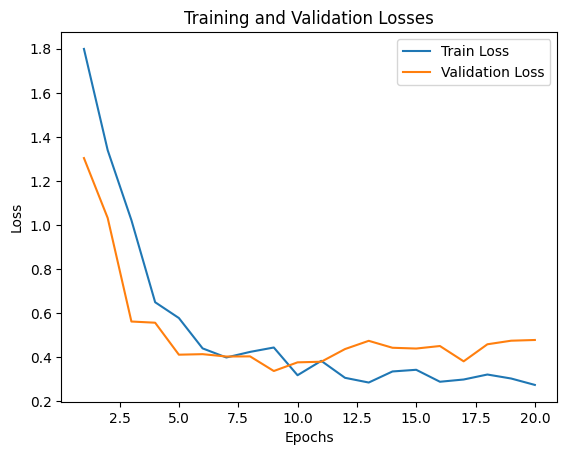

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
test_loss = 0.0
siamese_net = siamese_net_resnet50.cuda()
test_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/MyDrive/processed_image/small_dataset/testing"), transform=transformation), shuffle=True, batch_size=16)

# Iterate through the test dataset
with torch.no_grad():
    for img0, img1, label in test_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = siamese_net(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()  # Increment correct predictions
        total_samples += label.size(0)  # Increment total samples
        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        test_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
total_samples = total_samples*10                 #6 folders with each 10 images totalling 600 coombinations
avg_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions / total_samples *100 # Corrected test accuracy calculation
print("Correct Prediction count: ", correct_predictions, "Total Sample Count: ", total_samples)

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Correct Prediction count:  484 Total Sample Count:  600
Test Loss: 1.32581228017807, Test Accuracy: 80.66666666666666


In [ ]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_samples = 0

# Initialize variables for loss calculation
train_loss = 0.0

train_dataloader = DataLoader(SiameseNetworkDataset(imageFolderDataset=datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/small_dataset/training"), transform=transformation), shuffle=True, batch_size=2)
net = net.cuda()
with torch.no_grad():
    for img0, img1, label in train_dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 =  siamese_net_resnet50(img0, img1)

        # Calculate the euclidean distance between output vectors
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Apply a threshold to classify pairs as match (0) or non-match (1)
        predictions = (euclidean_distance < 1.2).float()

        # Compare predictions with ground truth labels
        correct_predictions += torch.sum(predictions == label).item()
        total_samples += label.size(0)

        # Calculate contrastive loss
        loss = criterion(output1, output2, label)
        train_loss += loss.item()
        #print(label, euclidean_distance)

# Calculate average test loss and accuracy
avg_test_loss = train_loss / len(train_dataloader)
test_accuracy = correct_predictions / total_samples*100
print("Correct Prediction count: ",correct_predictions, "Total Sample Count: ", total_samples)

print(f"Test Loss: {avg_test_loss}, Test Accuracy: {test_accuracy}")


Correct Prediction count:  148 Total Sample Count:  150
Test Loss: 1.4223430034251965, Test Accuracy: 98.66666666666667


# Siamese Network from Scratch with its own Conv Layers and FC's

In [ ]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 24, kernel_size=5, stride=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(24, 24, kernel_size=5, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(24, 128, kernel_size=3, stride=1)
        #.conv4 = nn.Conv2d(48, 128, kernel_size=3, stride=1)
        self.conv4 = nn.Conv2d(128, 192, kernel_size=3, stride=1)
        self.conv5 = nn.Conv2d(192, 128, kernel_size=3, stride=1)

        # Fully connected layers for similarity comparison
        self.fc1 = nn.Sequential(
            nn.Linear(8192, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        self.conv_layers = [self.conv1, self.pool1, self.conv2, self.pool2, self.conv3, self.conv4, self.conv5]

    def forward_once(self, x):
        # Forward pass through convolutional layers
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.relu(self.conv4(x))
        x = nn.functional.relu(self.conv5(x))

        # Flatten before passing through fully connected layers
        x = x.view(x.size()[0], -1)

        # Forward pass through fully connected layers
        x = self.fc1(x)
        return x

    def forward(self, input1, input2):
        # Forward pass for both images
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2


In [ ]:
# Define the Contrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive

In [ ]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0005 )

Layer 0 current layer Conv2d(3, 24, kernel_size=(5, 5), stride=(2, 2))
0 0 10
Layer 0, Epoch [1/10], Train Loss: 1.358914522924156, Val Loss: 1.0307913959026336
0 1 10
Layer 0, Epoch [2/10], Train Loss: 1.0881952373223884, Val Loss: 0.8867316583792368
0 2 10
Layer 0, Epoch [3/10], Train Loss: 0.9944636442950953, Val Loss: 0.8038056651751201
0 3 10
Layer 0, Epoch [4/10], Train Loss: 0.9446520551899883, Val Loss: 0.9545289576053619
0 4 10
Layer 0, Epoch [5/10], Train Loss: 0.9175850178036734, Val Loss: 0.8809603234132131
0 5 10
Layer 0, Epoch [6/10], Train Loss: 0.8432872747985002, Val Loss: 0.7080969125032425
0 6 10
Layer 0, Epoch [7/10], Train Loss: 0.9045787325529294, Val Loss: 1.0680236180623373
0 7 10
Layer 0, Epoch [8/10], Train Loss: 0.8337082052342245, Val Loss: 0.9798807700475057
0 8 10
Layer 0, Epoch [9/10], Train Loss: 0.842382997413662, Val Loss: 0.9248394052187602
0 9 10
Layer 0, Epoch [10/10], Train Loss: 0.8076994363392624, Val Loss: 0.9605400760968527
Layer 1 current laye

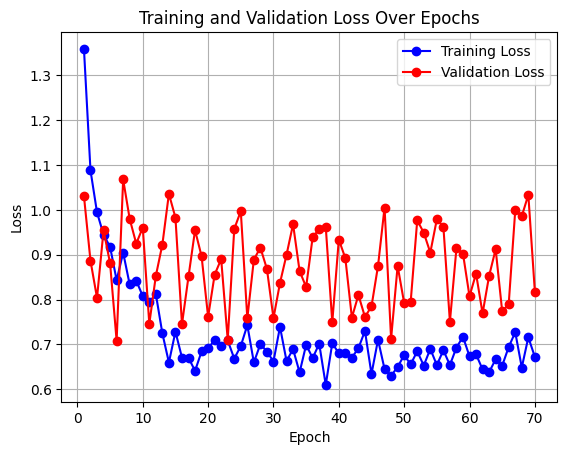

In [ ]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt


num_epochs_per_layer = 10
num_layers = 7  # Adjust this based on the number of layers in the network
num_layers_to_freeze = 6  # Number of layers to freeze initially



validation_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/validation/validation")


train_dataset = SiameseNetworkDataset(imageFolderDataset=training_dataset,
                                        transform=transformation)

validation_dataset = SiameseNetworkDataset(imageFolderDataset=validation_dataset,
                                        transform=transformation)



train_dataloader = DataLoader(train_dataset,
                        shuffle=True,
                        batch_size=8)

val_dataloader = DataLoader(validation_dataset,
                        shuffle=True,
                        batch_size=8)


# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Number of epochs per layer
num_epochs_per_layer = 10
num_layers = len(net.conv_layers)

# Initialize the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop for layer-wise training
for layer in range(num_layers):
    # Set current layer in SiameseNetwork
    net.current_layer = net.conv_layers[layer]

    print("Layer", layer, "current layer", net.current_layer)

    # Freeze all layers initially
    for conv_layer in net.conv_layers:
        for param in conv_layer.parameters():
            param.requires_grad = False

    # Unfreeze the current layer
    for param in net.current_layer.parameters():
        param.requires_grad = True

    for epoch in range(num_epochs_per_layer):
        # Training phase
        net.train()
        train_loss = 0.0

        for img0, img1, label in train_dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)
            loss_contrastive.backward()
            optimizer.step()

            train_loss += loss_contrastive.item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        # Validation phase
        net.eval()
        val_loss = 0.0

        with torch.no_grad():
            for img0, img1, label in val_dataloader:
                img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
                output1, output2 = net(img0, img1)
                loss_contrastive = criterion(output1, output2, label)
                val_loss += loss_contrastive.item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        print(layer, epoch, num_epochs_per_layer)

        # Print the loss for both training and validation sets
        print(f"Layer {layer}, Epoch [{epoch + 1}/{num_epochs_per_layer}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

        # Adjust learning rate based on validation loss
        scheduler.step(avg_val_loss)

# Plot the loss values
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Assuming you have defined SiameseNetwork, criterion, and other necessary components
# Also, make sure to have your test dataloader (test_dataloader) defined

testing_dataset = datasets.ImageFolder(root=r"/content/drive/My Drive/processed_image/testing/testing/")

testing_dataset = SiameseNetworkDataset(imageFolderDataset=testing_dataset,
                                        transform=transformation)

test_dataloader = DataLoader(testing_dataset,
                        shuffle=True,
                        batch_size=8)


# Evaluation phase (Testing)
net.eval()
test_loss = 0.0

with torch.no_grad():
    for img0, img1, label in test_dataloader:
        # img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        test_loss += loss_contrastive.item()

avg_test_loss = test_loss / len(test_dataloader)

# Print or use avg_test_loss as needed
print(f"Average Test Loss: {avg_test_loss}")


Average Test Loss: 0.9016104021242687


# Testing Siamese Network with Test Dataset

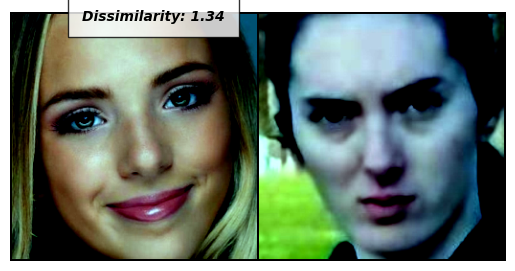

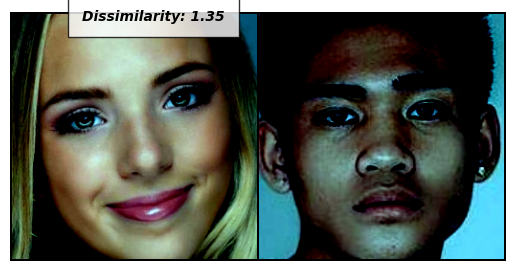

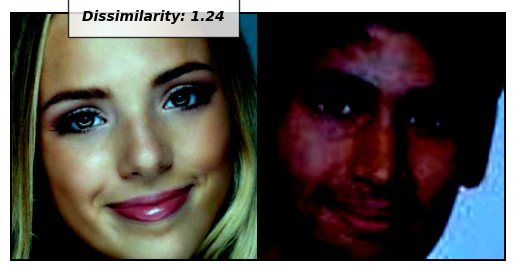

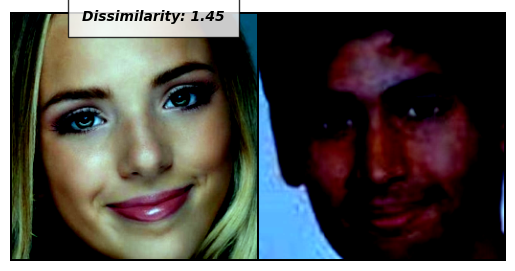

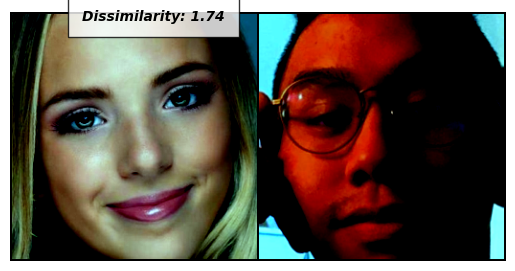

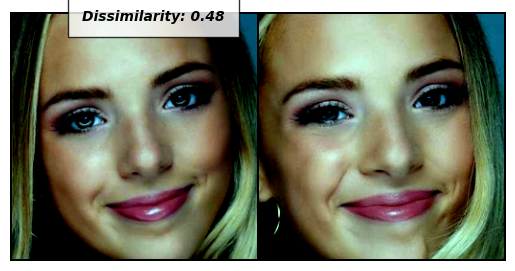

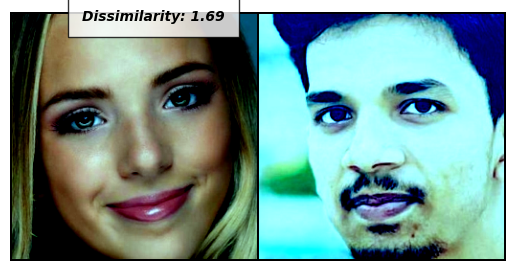

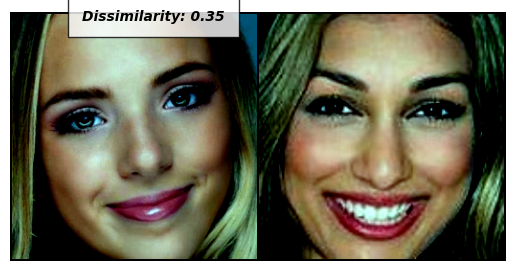

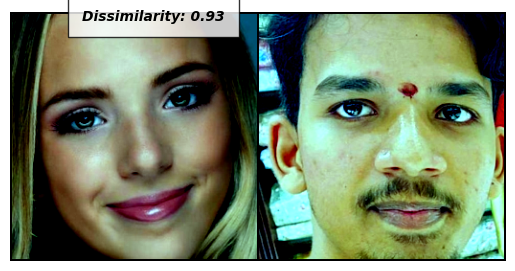

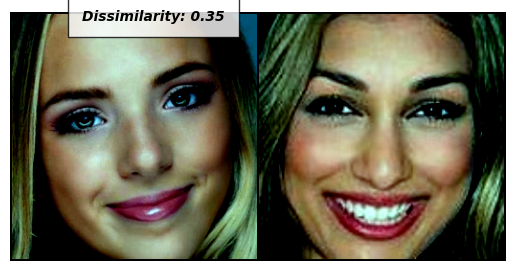

In [ ]:
# Locate the test dataset and load it into the SiameseNetworkDataset
folder_dataset_test = datasets.ImageFolder(root="/content/drive/My Drive/processed_image/testing/testing")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, num_workers=2, batch_size=1, shuffle=True)

# Grab one image that we are going to test
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(10):
    # Iterate over 10 images and test them with the first image (x0)
    _, x1, label2 = next(dataiter)

    # Concatenate the two images together
    concatenated = torch.cat((x0, x1), 0)


    output1, output2 = net(x0.cuda(), x1.cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

Upload the anchor image (x0):


Saving photo_19.jpg to photo_19 (8).jpg

Upload the test image (x1):


Saving photo_2.jpg to photo_2 (2).jpg


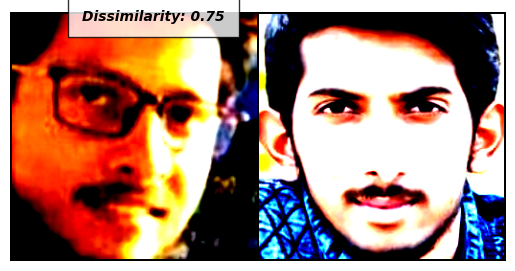

In [ ]:
from google.colab import files
from PIL import Image
import torch
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
import io

# Function to upload an image
def upload_image():
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]
    return Image.open(io.BytesIO(uploaded[img_path])).convert("RGB")

# Upload x0
print("Upload the anchor image (x0):")
x0 = upload_image()

# Upload x1
print("\nUpload the test image (x1):")
x1 = upload_image()

# Apply the transformation to the images
x0 = transformation(x0).unsqueeze(0)  # Add batch dimension
x1 = transformation(x1).unsqueeze(0)  # Add batch dimension

# Pass the images through the Siamese network and calculate dissimilarity
# output1, output2 = net(x0.cuda(), x1.cuda())
output1, output2 = net(x0, x1)
euclidean_distance = F.pairwise_distance(output1, output2)

# Display the concatenated images and dissimilarity score
imshow(torchvision.utils.make_grid(torch.cat((x0, x1), 0)), f'Dissimilarity: {euclidean_distance.item():.2f}')


In [ ]:
# Save the model
torch.save(net.state_dict(), '/content/siamese_model_base.pth')

# Implementation with Gradio

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.6 MB/s

In [ ]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 24, kernel_size=5, stride=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(24, 24, kernel_size=5, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(24, 128, kernel_size=3, stride=1)
        #.conv4 = nn.Conv2d(48, 128, kernel_size=3, stride=1)
        self.conv4 = nn.Conv2d(128, 192, kernel_size=3, stride=1)
        self.conv5 = nn.Conv2d(192, 128, kernel_size=3, stride=1)

        # Fully connected layers for similarity comparison
        self.fc1 = nn.Sequential(
            nn.Linear(8192, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 2)  # Output 2 values for similarity comparison
        )

        self.conv_layers = [self.conv1, self.pool1, self.conv2, self.pool2, self.conv3, self.conv4, self.conv5]

    def forward_once(self, x):
        # Forward pass through convolutional layers
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool2(x)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.relu(self.conv4(x))
        x = nn.functional.relu(self.conv5(x))

        # Flatten before passing through fully connected layers
        x = x.view(x.size()[0], -1)

        # Forward pass through fully connected layers
        x = self.fc1(x)
        return x

    def forward(self, input1, input2):
        # Forward pass for both images
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [ ]:
# Load the saved model state dictionary on the CPU
saved_state_dict = torch.load('/content/siamese_model_base.pth', map_location=torch.device('cpu'))

# Adjust the keys to match the current class definition
adjusted_state_dict = {}
for key, value in saved_state_dict.items():
    print(key)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
conv3.weight
conv3.bias
conv4.weight
conv4.bias
conv5.weight
conv5.bias
fc1.0.weight
fc1.0.bias
fc1.2.weight
fc1.2.bias
fc1.4.weight
fc1.4.bias
current_layer.weight
current_layer.bias


In [ ]:
# Remove unwanted keys
saved_state_dict.pop('current_layer.weight', None)
saved_state_dict.pop('current_layer.bias', None)

net = SiameseNetwork()
# Load the adjusted state dictionary into the model
net.load_state_dict(saved_state_dict)


<All keys matched successfully>

In [ ]:
# Put the model in evaluation mode
net.eval()

SiameseNetwork(
  (conv1): Conv2d(3, 24, kernel_size=(5, 5), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 24, kernel_size=(5, 5), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Sequential(
    (0): Linear(in_features=8192, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)

In [ ]:
import torchvision.transforms as transforms
import PIL
from PIL import ImageOps
import numpy as np


# Resize the images, apply histogram equalization, normalize, and convert to tensor
transformation = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization
])

In [ ]:
# Creating some helper functions
import matplotlib.pyplot as plt

def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [ ]:
import gradio as gr
from PIL import Image
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import io
import torchvision

def dissimilarity_calculation(img1, img2):
    # Convert to PIL Image if input is a NumPy array
    if isinstance(img1, np.ndarray):
        img1 = Image.fromarray(img1.astype('uint8'))

    if isinstance(img2, np.ndarray):
        img2 = Image.fromarray(img2.astype('uint8'))

    # Apply the transformation to the images
    x0 = transformation(img1).unsqueeze(0)  # Add batch dimension
    x1 = transformation(img2).unsqueeze(0)  # Add batch dimension

    # Pass the images through the Siamese network and calculate dissimilarity
    output1, output2 = net(x0, x1)
    euclidean_distance = F.pairwise_distance(output1, output2)

    # Display the concatenated images and dissimilarity score
    concatenated_images = torchvision.utils.make_grid(torch.cat((transforms.ToTensor()(img1.resize((256, 256), resample=Image.BILINEAR)).unsqueeze(0),
                                                                 transforms.ToTensor()(img2.resize((256, 256), resample=Image.BILINEAR)).unsqueeze(0)), 0))
    return f'Dissimilarity: {euclidean_distance.item():.2f}', Image.fromarray((concatenated_images.permute(1, 2, 0).numpy() * 255).astype('uint8'))

# Define the Gradio interface
demo = gr.Interface(fn=dissimilarity_calculation, inputs=["image", "image"], outputs=["text", "image"])

# Launch the Gradio interface
demo.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://47be115796e4ed6332.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
